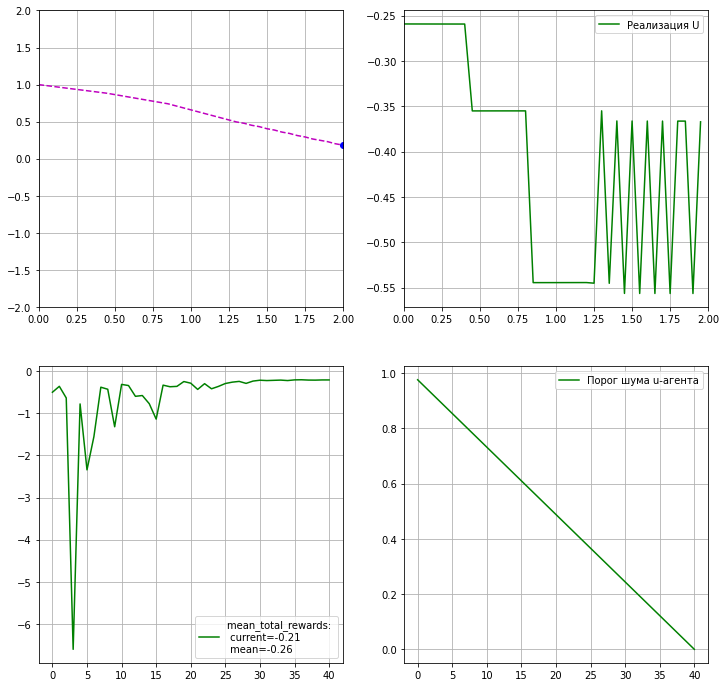

In [124]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import torch.nn as nn
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
from Agents.CVI import CVI, VModelWithGradient
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.Noises import OUNoise
from Solvers import OneAgentSolver as solver 
%load_ext autoreload
%autoreload 2

#learning parameters
episode_n = 41

#environment initialization
env = SimpleControlProblem()

#agent initialization
network = SequentialNetwork([env.state_dim, 256, 128, 1], nn.ReLU())
v_model = VModelWithGradient(env.action_min, env.action_max, network, env.r, env.g)
noise = OUNoise(action_dim=env.action_dim, threshold_decrease=1/episode_n)
agent = CVI(env.action_min, env.action_max, v_model, noise, env.virtual_step_for_batch,
            batch_size=128, gamma=1, tau=1e-2, v_model_lr=1e-3, predicted_step_n=4)

#learning
visualizer = SimpleControlProblemVisualizer(waiting_for_show=20)
solver.go(env, agent, episode_n=episode_n, show=visualizer.show, session_len=2500)